
# <font style="color: #d60e8c; text-align:center;">Práctica 5: Redes neuronales convolucionales

- Autor 1: Fabio González Saavedra
- Autor 2:

# <font style="color: #d60e8c; text-align:center;">Introducción
<hr style="border: 0.5px solid #d60e8c;">

## Importamos las librerías

In [20]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [21]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils 

In [22]:
SEED_VALUE = 0

# Fijamos al semilla para hacer determinista el entrenamiento.
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)
tf.keras.utils.set_random_seed(SEED_VALUE)

tf.config.experimental.enable_op_determinism()


## Cargamos los datos


In [23]:
from keras.datasets import mnist
# Cargar las imágenes
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [24]:
# Normalizar las imagenes de escala de grises 0–255 (entre 0 –1):
X_train = X_train / 255 
X_test = X_test / 255

# Codificar las etiquetas de clase en formato de vectores categoricos:
y_train_cat = utils.to_categorical (y_train) 
y_test_cat = utils.to_categorical (y_test)

In [25]:
_, n_rows, n_cols = X_train.shape
channels = 1

n_rows, n_cols, channels

(28, 28, 1)

## Exploramos los datos

Número de clases :  10
Clases :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Clase : 7')

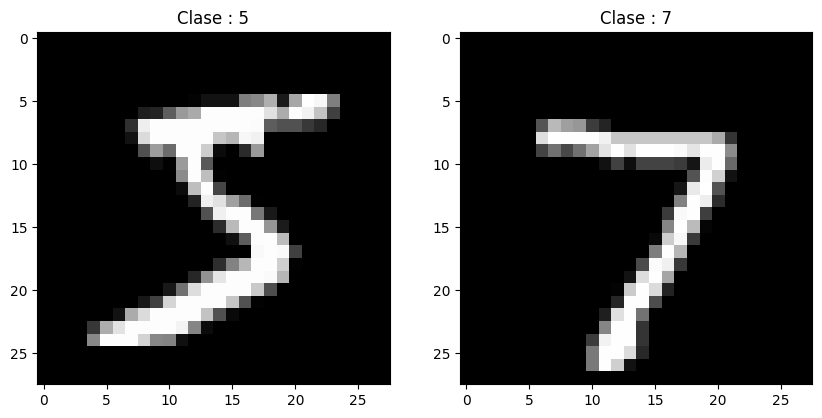

In [26]:
# Número de clases
classes = np.unique(y_train)
num_classes = y_train_cat[0].shape[0]

print('Número de clases : ', num_classes)
print('Clases : ', classes)

plt.figure(figsize=[10,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(X_train[0,:,:], cmap="gray")
plt.title(f"Clase : {y_train[0]}")

# Display the first image in testing data
plt.subplot(122)
plt.imshow(X_test[0,:,:], cmap="gray")
plt.title(f"Clase : {y_test[0]}")

In [27]:
print(f"Muestras entrenamiento: {X_train.shape[0]}")
print(f"Muestras test: {X_test.shape[0]}")
print(f"Total muestras: {X_train.shape[0] + X_test.shape[0]}")

Muestras entrenamiento: 60000
Muestras test: 10000
Total muestras: 70000


# <font style="color: #d60e8c;">Creamos el modelo
<hr style="border: 0.5px solid #d60e8c;">

Para implementar la CNN, añadiremos capas Convolucionales seguidas de capas de Max Pooling. Usaremos también Dropout para evitar el sobreentrenamniento. Finalmente, añadiremos un capa completamente conectada (Dense).


Información adicional sobre CNN:
- https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53


In [28]:
  model = keras.Sequential()

  model.add(layers.Conv2D(32, (3, 3), input_shape=(n_rows, n_cols, channels), activation="relu")) 
  model.add(layers.Conv2D(32, (3, 3),  activation="relu")) 
  model.add(layers.MaxPooling2D(pool_size=(2, 2))) 
  model.add(layers.Dropout(0.2))

  model.add(layers.Conv2D(64, (3, 3), activation="relu")) 
  model.add(layers.Conv2D(64, (3, 3), activation="relu")) 
  model.add(layers.MaxPooling2D(pool_size=(2, 2))) 
  model.add(layers.Dropout(0.2))

  model.add(layers.Flatten ())
  model.add(layers.Dense(64, activation="relu")) 
  model.add(layers.Dropout(0.2))
  # Capa de salida:
  model.add(layers.Dense(num_classes, activation="softmax"))
 
  model.compile(loss="categorical_crossentropy",optimizer="adam", metrics=['accuracy'])
  model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_34 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 conv2d_35 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 conv2d_36 (Conv2D)          (None, 8, 8, 64)          36928     
                                                      

In [29]:
max_epochs = 100
n_iter_no_change = 3

earlystop_callback = callbacks.EarlyStopping(monitor='val_loss', verbose = 1, restore_best_weights = True, patience=n_iter_no_change)

fit_history = model.fit(X_train , y_train_cat, 
    validation_data=(X_test , y_test_cat), 
    epochs=max_epochs, 
    batch_size=6000, 
    verbose=1,
    callbacks = [earlystop_callback])

Epoch 1/100
10/10 [==============================] - 7s 306ms/step - loss: 2.0307 - accuracy: 0.3095 - val_loss: 1.1668 - val_accuracy: 0.7047
Epoch 2/100
10/10 [==============================] - 3s 269ms/step - loss: 1.0044 - accuracy: 0.6635 - val_loss: 0.4323 - val_accuracy: 0.8787
Epoch 3/100
10/10 [==============================] - 3s 258ms/step - loss: 0.5025 - accuracy: 0.8413 - val_loss: 0.2404 - val_accuracy: 0.9300
Epoch 4/100
10/10 [==============================] - 3s 266ms/step - loss: 0.3055 - accuracy: 0.9066 - val_loss: 0.1523 - val_accuracy: 0.9527
Epoch 5/100
10/10 [==============================] - 3s 261ms/step - loss: 0.2098 - accuracy: 0.9363 - val_loss: 0.1109 - val_accuracy: 0.9655
Epoch 6/100
10/10 [==============================] - 3s 272ms/step - loss: 0.1646 - accuracy: 0.9505 - val_loss: 0.0840 - val_accuracy: 0.9743
Epoch 7/100
10/10 [==============================] - 3s 263ms/step - loss: 0.1365 - accuracy: 0.9595 - val_loss: 0.0707 - val_accuracy: 0.9771

In [30]:
# Evaluacion del modelo utilizando los datos de test: 
scores = model.evaluate(X_test , y_test_cat , verbose=0)
print (f"Exactitud del modelo: {scores[1]}")

Exactitud del modelo: 0.9927999973297119


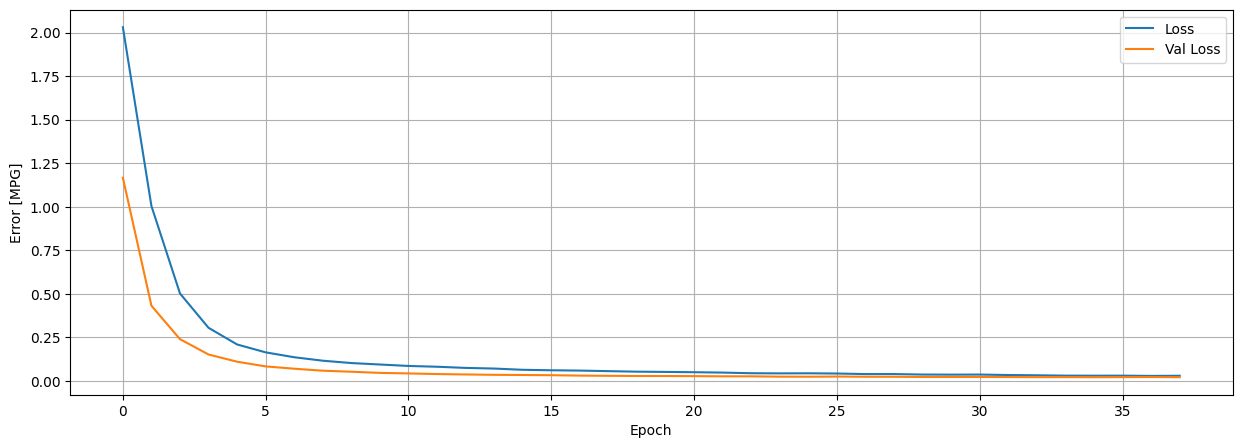

In [31]:
  plt.figure(figsize=(15,5))
  plt.plot(fit_history.history['loss'], label='Loss')
  plt.plot(fit_history.history['val_loss'], label='Val Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

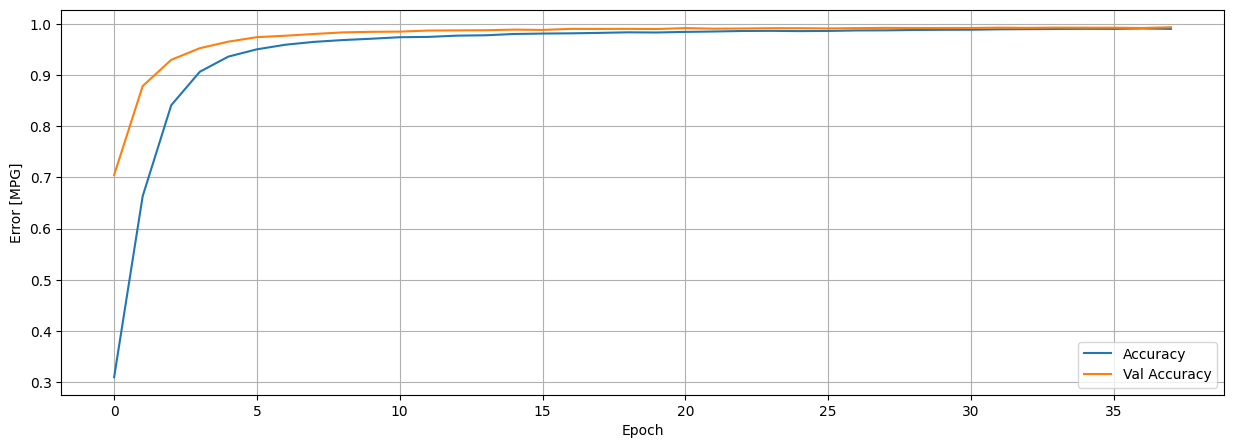

In [32]:
plt.figure(figsize=(15,5))
plt.plot(fit_history.history['accuracy'], label='Accuracy')
plt.plot(fit_history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

<div class="alert alert-block alert-info" 
     style="border: 0px solid #d60e8c; border-radius: 10px; background:#d60e8c; color: white;">
   <h2>EJERCICIO</h2>
    <hr style="border: 0.5px solid #ffffff;">
    <ul style="margin-bottom: 20px;">
        <li>Aplica la red anterior al conjunto de datos <b>fashion_mnist</b>.</li>
        <li>Realiza cambios en las capas convolucionales (añadiendo capas y/o modificando los parámetros)</li>
        <li>Reponde las siguientes preguntas: 
           <ul>
              <li>¿Qué ocurre con el tamaño de la imagen tras pasar por las capas convolucionales?</li>
              <li>Mira la documentación de las capa <a href="https://keras.io/api/layers/convolution_layers/convolution2d/">Conv2D</a>: ¿qué parametro o parámetros afectan al tamaño de la salida de la capa convolucional? Escribe el nombre y el efecto que produce.</li>
              <li>¿Para qué crees que sirve el número de filtros de las capas convolucionales?</li>              
           </ul>
        </li>        
    </ul>
</div>

Priemro se prueba el modelo empleado antes

28 28 1
Número de clases :  10
Clases :  [0 1 2 3 4 5 6 7 8 9]
Muestras entrenamiento: 60000
Muestras test: 10000
Total muestras: 70000
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_38 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 conv2d_39 (Conv2D)          (None, 10, 10, 64)        18496     
                                                  

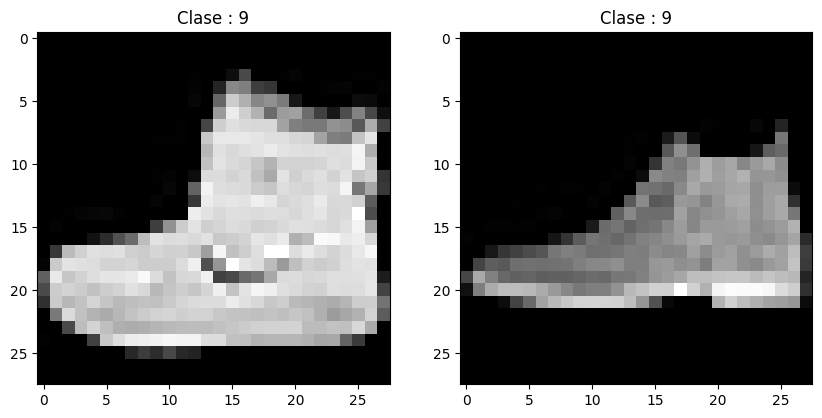

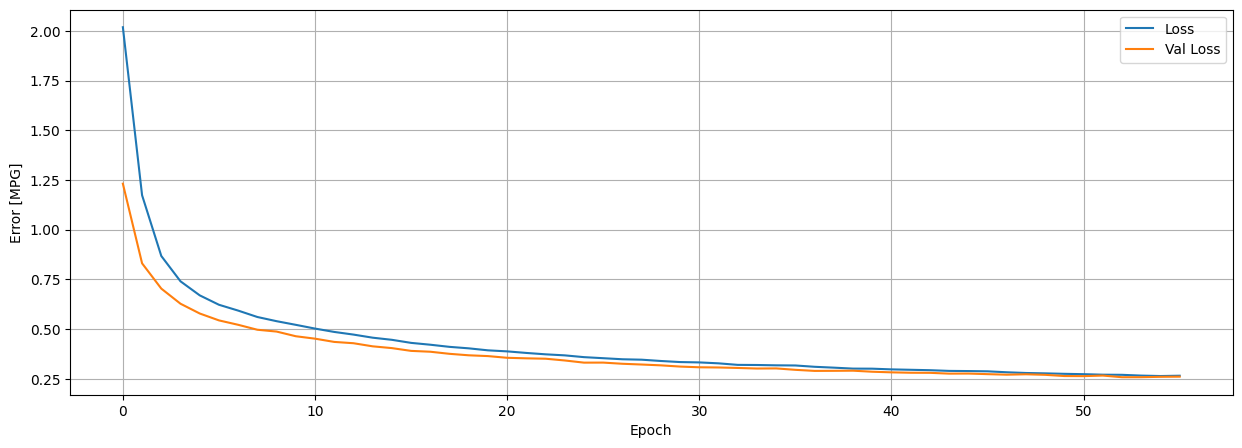

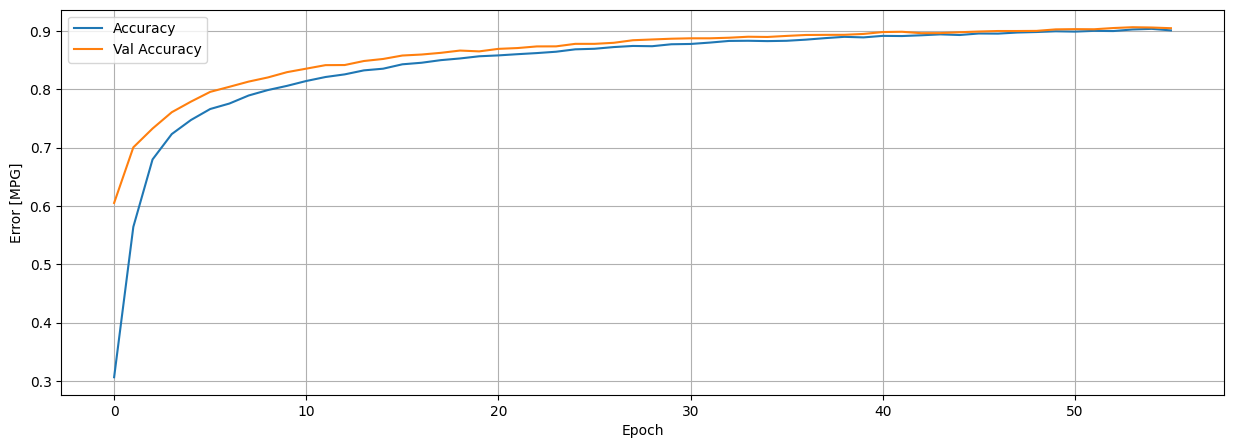

In [33]:
from tensorflow.keras.datasets import fashion_mnist

# Cargar las imágenes
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalizar las imagenes de escala de grises 0–255 (entre 0 –1):
X_train = X_train / 255 
X_test = X_test / 255

# Codificar las etiquetas de clase en formato de vectores categoricos:
y_train_cat = utils.to_categorical (y_train) 
y_test_cat = utils.to_categorical (y_test)

_, n_rows, n_cols = X_train.shape
channels = 1

print(n_rows, n_cols, channels)

# Número de clases
classes = np.unique(y_train)
num_classes = y_train_cat[0].shape[0]

print('Número de clases : ', num_classes)
print('Clases : ', classes)

plt.figure(figsize=[10,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(X_train[0,:,:], cmap="gray")
plt.title(f"Clase : {y_train[0]}")

# Display the first image in testing data
plt.subplot(122)
plt.imshow(X_test[0,:,:], cmap="gray")
plt.title(f"Clase : {y_test[0]}")

print(f"Muestras entrenamiento: {X_train.shape[0]}")
print(f"Muestras test: {X_test.shape[0]}")
print(f"Total muestras: {X_train.shape[0] + X_test.shape[0]}")

model = keras.Sequential()

model.add(layers.Conv2D(32, (3, 3), input_shape=(n_rows, n_cols, channels), activation="relu")) 
model.add(layers.Conv2D(32, (3, 3),  activation="relu")) 
model.add(layers.MaxPooling2D(pool_size=(2, 2))) 
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation="relu")) 
model.add(layers.Conv2D(64, (3, 3), activation="relu")) 
model.add(layers.MaxPooling2D(pool_size=(2, 2))) 
model.add(layers.Dropout(0.2))

model.add(layers.Flatten ())
model.add(layers.Dense(64, activation="relu")) 
model.add(layers.Dropout(0.2))
# Capa de salida:
model.add(layers.Dense(num_classes, activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam", metrics=['accuracy'])
model.summary()

max_epochs = 100
n_iter_no_change = 3

earlystop_callback = callbacks.EarlyStopping(monitor='val_loss', verbose = 1, restore_best_weights = True, patience=n_iter_no_change)


fit_history = model.fit(X_train , y_train_cat, 
    validation_data=(X_test , y_test_cat), 
    epochs=max_epochs, 
    batch_size=6000, 
    verbose=1,
    callbacks = [earlystop_callback])

#Evaluamos la exactitud del modelo
scores = model.evaluate(X_test , y_test_cat , verbose=0)
print (f"Exactitud del modelo: {scores[1]}")

plt.figure(figsize=(15,5))
plt.plot(fit_history.history['loss'], label='Loss')
plt.plot(fit_history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

plt.figure(figsize=(15,5))
plt.plot(fit_history.history['accuracy'], label='Accuracy')
plt.plot(fit_history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)



Prueba 1: se modifica el número de filtros en las primeras capas

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 26, 26, 46)        460       
                                                                 
 conv2d_42 (Conv2D)          (None, 24, 24, 46)        19090     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 12, 12, 46)       0         
 g2D)                                                            
                                                                 
 dropout_27 (Dropout)        (None, 12, 12, 46)        0         
                                                                 
 conv2d_43 (Conv2D)          (None, 10, 10, 72)        29880     
                                                                 
 conv2d_44 (Conv2D)          (None, 8, 8, 72)          46728     
                                                      

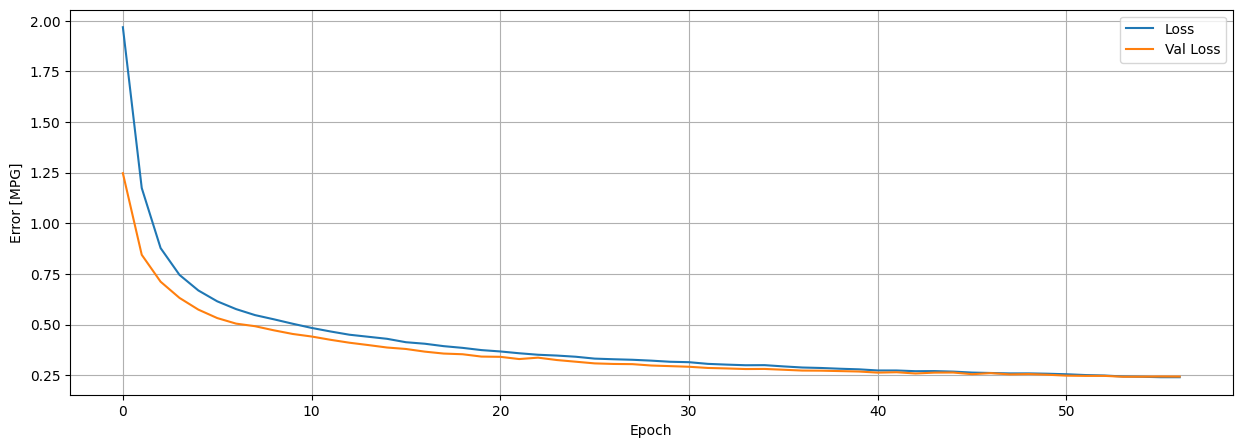

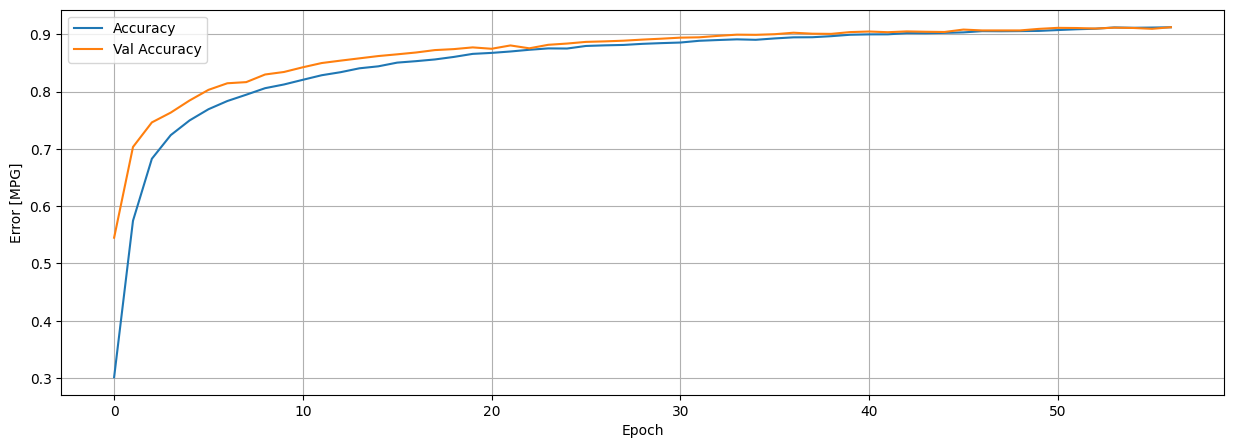

In [34]:

model2 = keras.Sequential()

model2.add(layers.Conv2D(46, (3, 3), input_shape=(n_rows, n_cols, channels), activation="relu")) 
model2.add(layers.Conv2D(46, (3, 3),  activation="relu")) 
model2.add(layers.MaxPooling2D(pool_size=(2, 2))) 
model2.add(layers.Dropout(0.2))

model2.add(layers.Conv2D(72, (3, 3), activation="relu")) 
model2.add(layers.Conv2D(72, (3, 3), activation="relu")) 
model2.add(layers.MaxPooling2D(pool_size=(2, 2))) 
model2.add(layers.Dropout(0.2))

model2.add(layers.Flatten ())
model2.add(layers.Dense(72, activation="relu")) 
model2.add(layers.Dropout(0.2))
# Capa de salida:
model2.add(layers.Dense(num_classes, activation="softmax"))

model2.compile(loss="categorical_crossentropy",optimizer="adam", metrics=['accuracy'])
model2.summary()

max_epochs = 100
n_iter_no_change = 3

earlystop_callback = callbacks.EarlyStopping(monitor='val_loss', verbose = 1, restore_best_weights = True, patience=n_iter_no_change)

fit_history = model2.fit(X_train , y_train_cat, 
    validation_data=(X_test , y_test_cat), 
    epochs=max_epochs, 
    batch_size=6000, 
    verbose=1,
    callbacks = [earlystop_callback])

#Evaluamos la exactitud del modelo
scores = model2.evaluate(X_test , y_test_cat , verbose=0)
print (f"Exactitud del modelo: {scores[1]}")

plt.figure(figsize=(15,5))
plt.plot(fit_history.history['loss'], label='Loss')
plt.plot(fit_history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

plt.figure(figsize=(15,5))
plt.plot(fit_history.history['accuracy'], label='Accuracy')
plt.plot(fit_history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)


Resultado prueba 1: Se aumenta ligeramente la exactitud del modelo. Por lo que al aumentar el número de filtro, el modelo categoriza mejor las imagenes debido a recoger un mayor número de carcterísticas

Prueba 2: Probamos ahora a aumentar el tamaño del kernel

In [ ]:

model2 = keras.Sequential()

model2.add(layers.Conv2D(46, (4, 4), input_shape=(n_rows, n_cols, channels), activation="relu")) 
model2.add(layers.Conv2D(46, (4, 4),  activation="relu")) 
model2.add(layers.Conv2D(46, (4, 4),  activation="relu")) 
model2.add(layers.MaxPooling2D(pool_size=(2, 2))) 
model2.add(layers.Dropout(0.2))

model2.add(layers.Conv2D(72, (4, 4), activation="relu")) 
model2.add(layers.Conv2D(72, (4, 4), activation="relu")) 
model2.add(layers.MaxPooling2D(pool_size=(2, 2))) 
model2.add(layers.Dropout(0.2))

model2.add(layers.Flatten ())
model2.add(layers.Dense(72, activation="relu")) 
model2.add(layers.Dropout(0.2))
# Capa de salida:
model2.add(layers.Dense(num_classes, activation="softmax"))

model2.compile(loss="categorical_crossentropy",optimizer="adam", metrics=['accuracy'])
model2.summary()

max_epochs = 100
n_iter_no_change = 3

earlystop_callback = callbacks.EarlyStopping(monitor='val_loss', verbose = 1, restore_best_weights = True, patience=n_iter_no_change)

fit_history = model2.fit(X_train , y_train_cat, 
    validation_data=(X_test , y_test_cat), 
    epochs=max_epochs, 
    batch_size=6000, 
    verbose=1,
    callbacks = [earlystop_callback])

#Evaluamos la exactitud del modelo
scores = model2.evaluate(X_test , y_test_cat , verbose=0)
print (f"Exactitud del modelo: {scores[1]}")

plt.figure(figsize=(15,5))
plt.plot(fit_history.history['loss'], label='Loss')
plt.plot(fit_history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

plt.figure(figsize=(15,5))
plt.plot(fit_history.history['accuracy'], label='Accuracy')
plt.plot(fit_history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 25, 25, 46)        782       
                                                                 
 conv2d_46 (Conv2D)          (None, 22, 22, 46)        33902     
                                                                 
 conv2d_47 (Conv2D)          (None, 19, 19, 46)        33902     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 9, 9, 46)         0         
 g2D)                                                            
                                                                 
 dropout_30 (Dropout)        (None, 9, 9, 46)          0         
                                                                 
 conv2d_48 (Conv2D)          (None, 6, 6, 72)          53064     
                                                     

Resultado: Como se observa se reduce la exactitud del modelo al aumentar el tamaño del kernel, esto debido a una mayor perdida de información en la dimension de las imagenes.

Prueba 3. Se añade padding para paliar la perdida de información.

In [ ]:

model2 = keras.Sequential()

model2.add(layers.Conv2D(46, (4, 4), input_shape=(n_rows, n_cols, channels), activation="relu")) 
model2.add(layers.Conv2D(46, (4, 4),  activation="relu", padding='same')) 
model2.add(layers.Conv2D(46, (4, 4),  activation="relu", padding='same')) 
model2.add(layers.MaxPooling2D(pool_size=(2, 2))) 
model2.add(layers.Dropout(0.2))

model2.add(keras.layers.ZeroPadding2D(padding=(2, 2)))
model2.add(layers.Conv2D(72, (4, 4), activation="relu", padding='same')) 
model2.add(layers.Conv2D(72, (4, 4), activation="relu")) 
model2.add(layers.MaxPooling2D(pool_size=(2, 2))) 
model2.add(layers.Dropout(0.2))

model2.add(layers.Flatten ())
model2.add(layers.Dense(72, activation="relu")) 
model2.add(layers.Dropout(0.2))
# Capa de salida:
model2.add(layers.Dense(num_classes, activation="softmax"))

model2.compile(loss="categorical_crossentropy",optimizer="adam", metrics=['accuracy'])
model2.summary()

max_epochs = 100
n_iter_no_change = 3

earlystop_callback = callbacks.EarlyStopping(monitor='val_loss', verbose = 1, restore_best_weights = True, patience=n_iter_no_change)

fit_history = model2.fit(X_train , y_train_cat, 
    validation_data=(X_test , y_test_cat), 
    epochs=max_epochs, 
    batch_size=6000, 
    verbose=1,
    callbacks = [earlystop_callback])

#Evaluamos la exactitud del modelo
scores = model2.evaluate(X_test , y_test_cat , verbose=0)
print (f"Exactitud del modelo: {scores[1]}")

plt.figure(figsize=(15,5))
plt.plot(fit_history.history['loss'], label='Loss')
plt.plot(fit_history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

plt.figure(figsize=(15,5))
plt.plot(fit_history.history['accuracy'], label='Accuracy')
plt.plot(fit_history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)


Se observa que el padding evita la reducción de las imagenes en las capas convolucionales, y se obtiene un mejor resultado. 

Prueba 4: Se probará aumentando el tamaño de kernel junto con el padding y una capa nueva convolucional

In [ ]:

model2 = keras.Sequential()

model2.add(layers.Conv2D(46, (4, 4), input_shape=(n_rows, n_cols, channels), activation="relu")) 
model2.add(layers.Conv2D(46, (4, 4),  activation="relu", padding='same')) 
model2.add(layers.Conv2D(46, (4, 4),  activation="relu", padding='same')) 
model2.add(layers.MaxPooling2D(pool_size=(2, 2))) 
model2.add(layers.Dropout(0.2))

model2.add(keras.layers.ZeroPadding2D(padding=(2, 2)))
model2.add(layers.Conv2D(72, (4, 4), activation="relu", padding='same')) 
model2.add(layers.Conv2D(72, (4, 4), activation="relu")) 
model2.add(layers.MaxPooling2D(pool_size=(2, 2))) 
model2.add(layers.Dropout(0.2))

model2.add(layers.Flatten ())
model2.add(layers.Dense(72, activation="relu")) 
model2.add(layers.Dropout(0.2))
# Capa de salida:
model2.add(layers.Dense(num_classes, activation="softmax"))

model2.compile(loss="categorical_crossentropy",optimizer="adam", metrics=['accuracy'])
model2.summary()

max_epochs = 100
n_iter_no_change = 3

earlystop_callback = callbacks.EarlyStopping(monitor='val_loss', verbose = 1, restore_best_weights = True, patience=n_iter_no_change)

fit_history = model2.fit(X_train , y_train_cat, 
    validation_data=(X_test , y_test_cat), 
    epochs=max_epochs, 
    batch_size=6000, 
    verbose=1,
    callbacks = [earlystop_callback])

#Evaluamos la exactitud del modelo
scores = model2.evaluate(X_test , y_test_cat , verbose=0)
print (f"Exactitud del modelo: {scores[1]}")

plt.figure(figsize=(15,5))
plt.plot(fit_history.history['loss'], label='Loss')
plt.plot(fit_history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

plt.figure(figsize=(15,5))
plt.plot(fit_history.history['accuracy'], label='Accuracy')
plt.plot(fit_history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

Resultado: 

In [ ]:

model2 = keras.Sequential()

model2.add(layers.Conv2D(46, (4, 4), input_shape=(n_rows, n_cols, channels), activation="relu")) 
model2.add(layers.Conv2D(46, (4, 4),  activation="relu", padding='same')) 
model2.add(layers.Conv2D(46, (4, 4),  activation="relu", padding='same')) 
model2.add(layers.MaxPooling2D(pool_size=(2, 2))) 
model2.add(layers.Dropout(0.2))

model2.add(layers.Conv2D(72, (4, 4), activation="relu", padding='same')) 
model2.add(layers.Conv2D(72, (4, 4), activation="relu", padding='same')) 
model2.add(layers.Conv2D(72, (4, 4), activation="relu", padding='same')) 
model2.add(layers.MaxPooling2D(pool_size=(2, 2))) 
model2.add(layers.Dropout(0.2))

model2.add(layers.Flatten ())
model2.add(layers.Dense(72, activation="relu")) 
model2.add(layers.Dropout(0.2))
# Capa de salida:
model2.add(layers.Dense(num_classes, activation="softmax"))

model2.compile(loss="categorical_crossentropy",optimizer="adam", metrics=['accuracy'])
model2.summary()

max_epochs = 100
n_iter_no_change = 4

earlystop_callback = callbacks.EarlyStopping(monitor='val_loss', verbose = 1, restore_best_weights = True, patience=n_iter_no_change)

fit_history = model2.fit(X_train , y_train_cat, 
    validation_data=(X_test , y_test_cat), 
    epochs=max_epochs, 
    batch_size=6000, 
    verbose=1,
    callbacks = [earlystop_callback])

#Evaluamos la exactitud del modelo
scores = model2.evaluate(X_test , y_test_cat , verbose=0)
print (f"Exactitud del modelo: {scores[1]}")

plt.figure(figsize=(15,5))
plt.plot(fit_history.history['loss'], label='Loss')
plt.plot(fit_history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

plt.figure(figsize=(15,5))
plt.plot(fit_history.history['accuracy'], label='Accuracy')
plt.plot(fit_history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

Reponde las siguientes preguntas:
¿Qué ocurre con el tamaño de la imagen tras pasar por las capas convolucionales?

Al pasar por las capas convolucionales se reduce la dimensión de la misma, siempre que no se use un padding para evitarlo.
Si se emplean varias capas convolucionales sin padding podemos llegar quedarnos sin imagen debido a esa redución de dimensionalidad.

Mira la documentación de las capa Conv2D: ¿qué parametro o parámetros afectan al tamaño de la salida de la capa convolucional? Escribe el nombre y el efecto que produce.

El kernel y strikes.
El kernel es el parametro que al ir recorriendo la matriz (imagen) reduce una dimensión de la imagen. 
El parametro strikes es el paso que avanza el kernel, al desplazarse más posiciones se reduce más el tamaño de la imagen

¿Para qué crees que sirve el número de filtros de las capas convolucionales?

El numero de filtros es el número de características que puede aprender la red 
